# ROC

The ROC (Receiver operating characteristic) curve is a tool used to measure the performance of a classifier. The curve is created by plotting the **true positive rate** (TPR) Vs. the **false positive rate** (FPR), these two are defined as:

* $TPR = \frac{TP}{TP + FN}$
* $FPR = \frac{FP}{FP + TN}$

Where $TP$, $FN$, $FP$, and $TN$ denote true positives, false negatives, false positives, and true negatives, respectively. It is important to mention that the reason we can draw a ROC curve is because **TPR** and **FPR** are functions of the threshold used in the classifier.

The nice thing about using the ROC curve to measure your model's performance is that if you have several models, you can draw their ROC curves in the same plot and compare them. Furthermore, the area under the ROC curve tells us how good the classifier is. An area of 1 will denote the perfect classifier, while an area of 0.5 denotes that the model has no prediction capabilities.

## Data Creation
In the following block of code we import the functions we will use to exhibit how to use the ROC curve when comparing two models.

In [1]:
#Import functions
from mlb_misc_functions import generate_dummy_probs_true_y, create_dummy_scores
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

Let’s imagine that you are in charge of comparing the performance of two classifiers, you have the following data:
* ```target```: a list with the targets for a test set.
*  ```probs_model1```: a list with the probabilities (scores from 0 to 1) obtained by model 1.
*  ```probs_model2```: a list with the probabilities (scores from 0 to 1) obtained by model 2.

Each one of the lists mentioned above have 10,000 elements. In the following block of code we create our toy data:

In [2]:
#Create targets for both models and the probabilities for model1
target, probs_model1 = generate_dummy_probs_true_y()

#Create probabilities for model 2
probs_model2 = create_dummy_scores(10000)

Let's take a look at the first 3 elements of each list:

In [3]:
#Print the first 3 elements of the 3 lists we generated in the block of code above.
print("targets: ", target[:3])
print("model 1 probabilities: ", probs_model1[:3])
print("model 2 probabilities: ", probs_model2[:3])

targets:  [1, 0, 0]
model 1 probabilities:  [0.8432862047592738, 0.37394198381398114, 0.22484170972081138]
model 2 probabilities:  [0.10414595876498689, 0.7900950766903548, 0.2916660481728408]


## Model Performance Comparison

In order to make a performance comparison between both models we will plot the ROC curves of both models in the same graph. 

In the block of code below we generate the FPR, TPR, and the thresholds for both models using the function ```roc_curve()```. This function takes 2 arguments:

1. The targets
2. The model's probabilities

In [4]:
#Obtain FPR, TPR and thresholds for model 1 and 2
fpr_model1, tpr_model1, thresh_model1 = roc_curve(target, probs_model1)
fpr_model2, tpr_model2, thresh_model2 = roc_curve(target, probs_model2)

It is important to mention the following:

* We passed 2 arguments to the function ```roc_curve()```, the targets and the model's probabilities (scores). However, it is possible to pass other arguments to this function, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for more information about it.

* The function ```roc_curve``` returns 3 lists: FPR, TRP and thresholds. In this notebook we will only use FPR and TRP. However, the thresholds can be used to generate plot FPR and TPR Vs. threshold curves. 

## Plot of the ROC curves
In the following block of code we plot both ROC curves in one graph

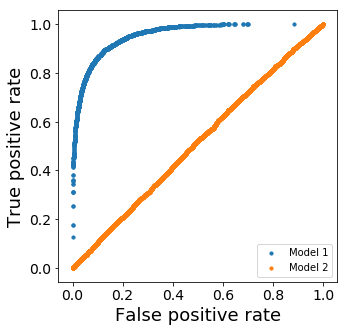

In [5]:
#Plot ROC curves
plt.figure(figsize=(5, 5))
plt.scatter(fpr_model1, tpr_model1, label="Model 1", s=10)
plt.scatter(fpr_model2, tpr_model2, label="Model 2", s=10)
plt.xlabel("False positive rate", fontsize=18)
plt.ylabel("True positive rate", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

As can be seen the blue line (model 1) is on top of the orange line (model 2), this indicates that model 1 exhibits a better performance than model 2.

It is important to mention that the perfect model would exhibit a ROC curve starting at the origin (0, 0) moving vertically up towards the point (0, 1) and then moving horizontally towards the point (1, 1). On the other hand, a model with no prediction capabilities would exhibit a ROC curve starting at the origin (0, 0), and then moving on a straight line towards the (1, 1) point (model 2 has no prediction capability).

## Area Under the ROC Curve 

The area under the ROC curve gives us simple way of comparing the performance of two models. An area of 1 denotes the perfect model, while an area of 0.5 denotes a model with no predictive capabilities.

A simple way of calculating this area is using the ```roc_auc_score()``` function from sklearn. In the block of code below we calculate the area under the curve (AUC) for both models and print it to screen.

In [6]:
#Calculate area under the curve for both ROCs
auc_model1 = roc_auc_score(target, probs_model1)
auc_model2 = roc_auc_score(target, probs_model2)

#Print the area under the curve
print(auc_model1)
print(auc_model2)

0.9558633200829626
0.5118062231978818


It is important to notice that we are passing two arguments into the function ``` roc_auc_score()```, the targets and the probabilities (scores) of our models. However, it is possible to pass other arguments into this function. For more information about it, please see [here]( https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

As expected, model's 1 AUC is very high (close to 1) while model's 2 AUC is very low (close to 0.5), indicating that model 1 has a better performance than model 2.

## Final words
We went over how to use the ROC to measure model performance and how can we use it to compare two models. Now it is you turn to start coding, try the following:

* Modify the existing probabilities for model 1 and see how the ROC curve changes.

* Plot FPR and TRP as a function of thresholds.
